## Part 8 - Decision Tree

### Modèle - Decision Tree 

In [1]:
import pandas as pd 
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt
 
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [2]:
# Chargement de la dataset
## Choix de 4 datasets, ne pas oublier de choisir la features_list adéquate

#dataset = pd.read_csv("dataset_CV_labelise_features1_100.csv", delimiter = ";", encoding = "utf-8") ## 100CV + 4 features numériques

#dataset = pd.read_csv("dataset_CV_labelise_features1_200.csv", delimiter = ";", encoding = "utf-8") ## 200CV + 4 features numériques

#dataset = pd.read_csv("dataset_CV_labelise_features2_100.csv", delimiter = ";", encoding = "utf-8") ## 100CV + 12 features numériques

dataset = pd.read_csv("dataset_CV_labelise_features2_200.csv", delimiter = ";", encoding = "utf-8") ## 200CV + 12 features numériques

In [3]:
dataset.head()

,CV_Sentences,Sentences_CV_clean,CV_Number,Sentence_line,Nb_tokens,%texte_lu,%texte_lu_fin_ligne,Is_alpha,Grammar,Tokenization,Verb_count,Propn_count,Noun_count,Num_count,Pourcentage_verb_sentence,Pourcentage_propn_sentence,Pourcentage_noun_sentence,Pourcentage_num_sentence,Label
0,SELMA LAFKIR CORDE 80 CODEUSE ENTHOUSIASTE,SELMA LAFKIR CORDE 80 CODEUSE ENTHOUSIASTE,CV_1,0,6,2.80,97.20,"[True, True, True, False, True, True]","['NOUN', 'PROPN', 'VERB', 'NUM', 'PROPN', 'PRO...",SELMA LAFKIR CORDE 80 CODEUSE ENTHOUSIASTE,1,3,1,1,0.166667,0.500000,0.166667,0.166667,1
1,PROFIL,PROFIL,CV_1,1,1,3.27,96.73,[True],['NOUN'],PROFIL,0,0,1,0,0.000000,0.000000,1.000000,0.000000,0
2,PERSONNEL Je suis étudiante au lycée Condorcet.,PERSONNEL Je suis étudiante au lycée Condorcet.,CV_1,2,8,7.01,92.99,"[True, True, True, True, True, True, True, False]","['NOUN', 'PRON', 'AUX', 'ADJ', 'ADP', 'NOUN', ...",PERSONNEL Je suis étudiante au lycée Condorcet.,0,1,2,0,0.000000,0.125000,0.250000,0.000000,0
3,Je code depuis l'âge de 13 ans et j'aime créer...,Je code depuis l'âge de 13 ans et j'aime créer...,CV_1,3,24,18.22,81.78,"[True, True, True, False, True, True, False, T...","['PRON', 'VERB', 'ADP', 'DET', 'NOUN', 'ADP', ...",Je code depuis l'âge de 13 ans et j'aime créer...,5,1,5,1,0.208333,0.041667,0.208333,0.041667,0
4,RÉALISATIONS,RÉALISATIONS,CV_1,4,1,18.69,81.31,[True],['NOUN'],RÉALISATIONS,0,0,1,0,0.000000,0.000000,1.000000,0.000000,0


In [4]:
dataset.shape

(2898, 19)

In [5]:
data_desc = dataset.describe(include='all')
display(data_desc)

,CV_Sentences,Sentences_CV_clean,CV_Number,Sentence_line,Nb_tokens,%texte_lu,%texte_lu_fin_ligne,Is_alpha,Grammar,Tokenization,Verb_count,Propn_count,Noun_count,Num_count,Pourcentage_verb_sentence,Pourcentage_propn_sentence,Pourcentage_noun_sentence,Pourcentage_num_sentence,Label
count,2898,2897,2898,2898.000000,2898.000000,2898.000000,2898.000000,2898,2898,2897,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000
unique,2111,2109,100,NaN,NaN,NaN,NaN,967,1544,2109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,,,CV_10,NaN,NaN,NaN,NaN,[False],['NOUN'],,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,93,93,66,NaN,NaN,NaN,NaN,349,188,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,16.277433,9.095583,50.855776,49.144227,NaN,NaN,NaN,0.325742,0.594548,2.842995,0.332988,0.022207,0.108457,0.321501,0.052901,0.040718
std,NaN,NaN,NaN,11.772216,10.718324,30.046625,30.046628,NaN,NaN,NaN,0.825989,1.071260,3.489991,0.679516,0.066677,0.234926,0.253283,0.157466,0.197670
min,NaN,NaN,NaN,0.000000,1.000000,0.240000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,7.000000,2.000000,25.120000,23.242500,NaN,NaN,NaN,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000
50%,NaN,NaN,NaN,14.000000,5.000000,50.320000,49.680000,NaN,NaN,NaN,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.312500,0.000000,0.000000
75%,NaN,NaN,NaN,24.000000,12.000000,76.757500,74.880000,NaN,NaN,NaN,0.000000,1.000000,4.000000,0.000000,0.000000,0.108108,0.428571,0.000000,0.000000


In [6]:
# Visualisation des valeurs 'Null' dans la dataset
display(100*dataset.isnull().sum()/dataset.shape[0])

CV_Sentences                  0.000000
Sentences_CV_clean            0.034507
CV_Number                     0.000000
Sentence_line                 0.000000
Nb_tokens                     0.000000
%texte_lu                     0.000000
%texte_lu_fin_ligne           0.000000
Is_alpha                      0.000000
Grammar                       0.000000
Tokenization                  0.034507
Verb_count                    0.000000
Propn_count                   0.000000
Noun_count                    0.000000
Num_count                     0.000000
Pourcentage_verb_sentence     0.000000
Pourcentage_propn_sentence    0.000000
Pourcentage_noun_sentence     0.000000
Pourcentage_num_sentence      0.000000
Label                         0.000000
dtype: float64

## Preprocessing

In [7]:
# Vérifier des valeurs de la colonne label
dataset["Label"].unique()

array([1, 0], dtype=int64)

In [8]:
# Suppression des lignes de CV_Sentences avec les '#NOM?'
dataset = dataset.loc[(dataset['CV_Sentences'] != "#NOM?"),:]
dataset.shape

In [10]:
# Suppression des lignes de CV_Sentences avec ':'
dataset = dataset.loc[(dataset['CV_Sentences'] != ":"),:]
dataset.shape

In [12]:
# Suppresion des lignes sans valeur (avec NaN)
dataset = dataset.dropna(axis =0, how = 'any')
dataset.shape

In [14]:
# Vérification de la présence des valeurs 'Null' dans la dataset
display(100*dataset.isnull().sum()/dataset.shape[0])

CV_Sentences                  0.0
Sentences_CV_clean            0.0
CV_Number                     0.0
Sentence_line                 0.0
Nb_tokens                     0.0
%texte_lu                     0.0
%texte_lu_fin_ligne           0.0
Is_alpha                      0.0
Grammar                       0.0
Tokenization                  0.0
Verb_count                    0.0
Propn_count                   0.0
Noun_count                    0.0
Num_count                     0.0
Pourcentage_verb_sentence     0.0
Pourcentage_propn_sentence    0.0
Pourcentage_noun_sentence     0.0
Pourcentage_num_sentence      0.0
Label                         0.0
dtype: float64

Application du modèle Decision Tree

In [15]:
print("Separating labels from features...")

## Choisir la features_list par rapport au dataset
#features_list = ["CV_Sentences","Sentences_CV_clean","CV_Number", "Is_alpha", "Grammar", "Label"] ## Pour les datasets features1
features_list = ["CV_Sentences","Sentences_CV_clean","CV_Number", "Is_alpha", "Label", "Grammar", "Tokenization"] ## Pour les datasets features2
target_variable = "Label"

X = dataset.drop(features_list, axis = 1)
y = dataset.loc[:,target_variable]

print('y : ')
print(y.head())
print()
print('X :')
print(X.head())

Separating labels from features...
y : 
0    1
1    0
2    0
3    0
4    0
Name: Label, dtype: int64

X :
   Sentence_line  Nb_tokens  %texte_lu  %texte_lu_fin_ligne  Verb_count  \
0              0          6       2.80                97.20           1   
1              1          1       3.27                96.73           0   
2              2          8       7.01                92.99           0   
3              3         24      18.22                81.78           5   
4              4          1      18.69                81.31           0   

   Propn_count  Noun_count  Num_count  Pourcentage_verb_sentence  \
0            3           1          1                   0.166667   
1            0           1          0                   0.000000   
2            1           2          0                   0.000000   
3            1           5          1                   0.208333   
4            0           1          0                   0.000000   

   Pourcentage_propn_sentence  Pou

In [16]:
# Automatically detect names of numeric/categorical columns
numeric_features = []
categorical_features = []
for i,t in X.dtypes.iteritems():
    if ('float' in str(t)) or ('int' in str(t)) :
        numeric_features.append(i)
    else :
        categorical_features.append(i)

print('Found numeric features ', numeric_features)
print('Found categorical features ', categorical_features)

Found numeric features  ['Sentence_line', 'Nb_tokens', '%texte_lu', '%texte_lu_fin_ligne', 'Verb_count', 'Propn_count', 'Noun_count', 'Num_count', 'Pourcentage_verb_sentence', 'Pourcentage_propn_sentence', 'Pourcentage_noun_sentence', 'Pourcentage_num_sentence']
Found categorical features  []


In [17]:
# Divide dataset Train set & Test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [18]:
# Create pipeline for numeric features
numeric_transformer = SimpleImputer(strategy='mean')

In [19]:
# Create pipeline for categorical features
categorical_transformer = OneHotEncoder(drop='first')

In [20]:
# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [21]:
# Preprocessings on train set
print("Performing preprocessings on train set...")
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X_train[0:5]) # MUST use this syntax because X_train is a numpy array and not a pandas DataFrame anymore
print()
# Label encoding
print("Encoding labels...")
print(y_train.head())
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
print("...Done")
print(y_train[0:5])

# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test.head()) 
X_test = preprocessor.transform(X_test) # Don't fit again !! The test set is used for validating decisions
# we made based on the training set, therefore we can only apply transformations that were parametered using the training set.
# Otherwise this creates what is called a leak from the test set which will introduce a bias in all your results.
print('...Done.')
print(X_test[0:5,:]) # MUST use this syntax because X_test is a numpy array and not a pandas DataFrame anymore
print()
# Label encoding
print("Encoding labels...")
print(y_test[0:5])
y_test = encoder.transform(y_test)
print("...Done")
print(y_test[0:5])

Performing preprocessings on train set...
...Done.
[[1.20000000e+01 2.10000000e+01 6.18600000e+01 3.81400000e+01
  2.00000000e+00 0.00000000e+00 6.00000000e+00 1.00000000e+00
  9.52380952e-02 0.00000000e+00 2.85714286e-01 4.76190476e-02]
 [1.40000000e+01 3.40000000e+01 6.68200000e+01 3.31800000e+01
  1.00000000e+00 1.00000000e+00 1.40000000e+01 1.00000000e+00
  2.94117647e-02 2.94117647e-02 4.11764706e-01 2.94117647e-02]
 [1.20000000e+01 2.50000000e+01 6.06700000e+01 3.93300000e+01
  3.00000000e+00 0.00000000e+00 6.00000000e+00 0.00000000e+00
  1.20000000e-01 0.00000000e+00 2.40000000e-01 0.00000000e+00]
 [1.30000000e+01 2.50000000e+01 3.50900000e+01 6.49100000e+01
  0.00000000e+00 0.00000000e+00 1.00000000e+01 0.00000000e+00
  0.00000000e+00 0.00000000e+00 4.00000000e-01 0.00000000e+00]
 [6.00000000e+00 1.00000000e+00 1.97800000e+01 8.02200000e+01
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]]

Encoding lab

Application de GridSearch

In [22]:
# Perform grid search
print("Grid search...") 
classifier = DecisionTreeClassifier()

# Grid of values to be tested
params = {
    'max_depth': [4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 5],
    'min_samples_split': [2, 4, 8]
}
gridsearch = GridSearchCV(classifier, param_grid = params, cv = 3) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation accuracy : ", gridsearch.best_score_)

Grid search...
...Done.
Best hyperparameters :  {'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 4}
Best validation accuracy :  0.9751330078413968


In [23]:
# Predictions on training set
print("Predictions on training set...")
y_train_pred = gridsearch.predict(X_train)
print("...Done.")
print(y_train_pred)
print()

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on training set...")
y_train_proba = gridsearch.predict_proba(X_train)
print("...Done.")
print(y_train_proba)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]

Probabilities on training set...
...Done.
[[0.99755501 0.00244499]
 [0.99755501 0.00244499]
 [0.99755501 0.00244499]
 ...
 [0.99755501 0.00244499]
 [0.99755501 0.00244499]
 [0.99755501 0.00244499]]



In [24]:
# Predictions on test set
print("Predictions on test set...")
y_test_pred = gridsearch.predict(X_test)
print("...Done.")
print(y_test_pred)
print()

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on test set...")
y_test_proba = gridsearch.predict_proba(X_test)
print("...Done.")
print(y_test_proba)
print()

Predictions on test set...
...Done.
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0

In [25]:
# Print scores
print("accuracy on training set : ", accuracy_score(y_train, y_train_pred))
print("accuracy on test set : ", accuracy_score(y_test, y_test_pred))
print()

print("f1-score on training set : ", f1_score(y_train, y_train_pred))
print("f1-score on test set : ", f1_score(y_test, y_test_pred))
print()

accuracy on training set :  0.9857904085257548
accuracy on test set :  0.9680284191829485

f1-score on training set :  0.8024691358024691
f1-score on test set :  0.5499999999999999



Matrice de confusion

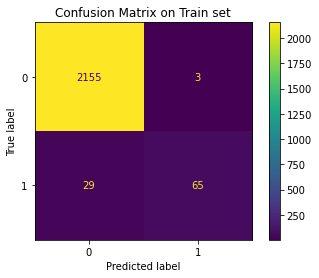

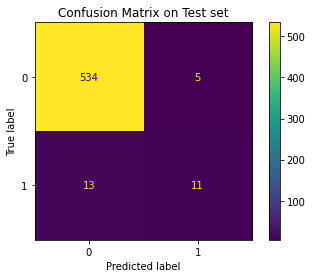

In [26]:
# Visualize confusion matrices
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(gridsearch, X_train, y_train, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(gridsearch, X_test, y_test, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

ROC Curves

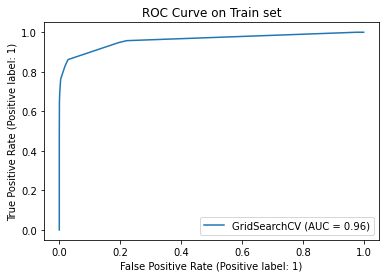

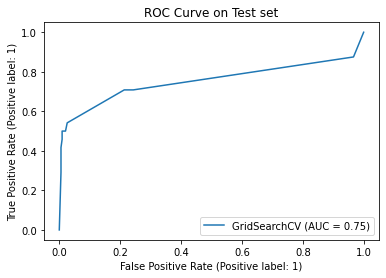

In [27]:
# Visualize ROC curves
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="ROC Curve on Train set") # Set a title that we will add into ConfusionMatrixDisplay
RocCurveDisplay.from_estimator(gridsearch, X_train, y_train, ax=ax) # RocCurveDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="ROC Curve on Test set") # Set a title that we will add into ConfusionMatrixDisplay
RocCurveDisplay.from_estimator(gridsearch, X_test, y_test, ax=ax) # RocCurveDisplay from sklearn
plt.show() 

Fin Part 8